In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 




In [11]:
# Establish a connection to your SQLite database (replace with MySQL connection if needed)
conn = sqlite3.connect('MaterialsDB')



In [12]:
# SQL query to fetch particle size and thermal conductivity data
query = '''
SELECT m.ParticleSize, p.PropertyValue AS ThermalConductivity
FROM Materials m
JOIN Properties p ON m.MaterialID = p.MaterialID
WHERE p.PropertyName = 'Thermal Conductivity';
'''




In [13]:
# Execute the query and store results in a pandas DataFrame
particle_size_vs_thermal_conductivity = pd.read_sql_query(query, conn)



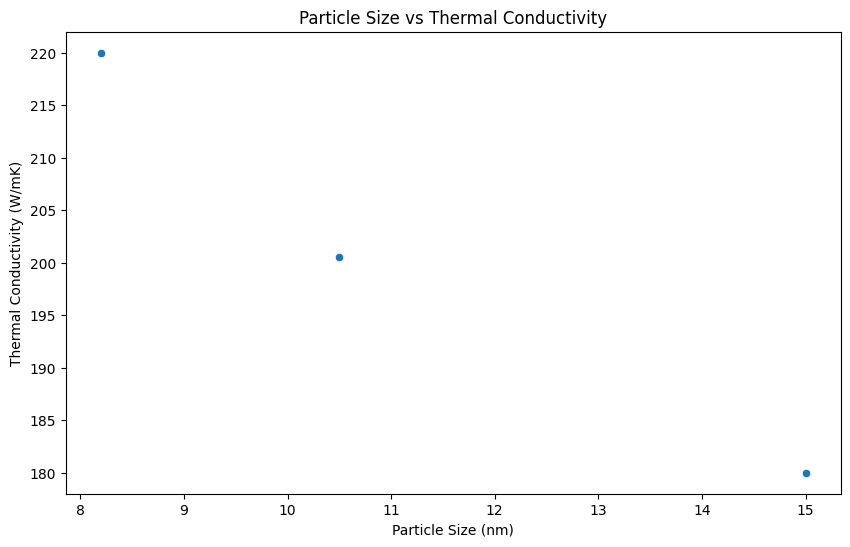

In [8]:

# Plotting the data using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ParticleSize', y='ThermalConductivity', data=particle_size_vs_thermal_conductivity)
plt.title('Particle Size vs Thermal Conductivity')
plt.xlabel('Particle Size (nm)')
plt.ylabel('Thermal Conductivity (W/mK)')
plt.savefig('../visualizations/Particle Size vs Thermal Conductivity')
plt.show()

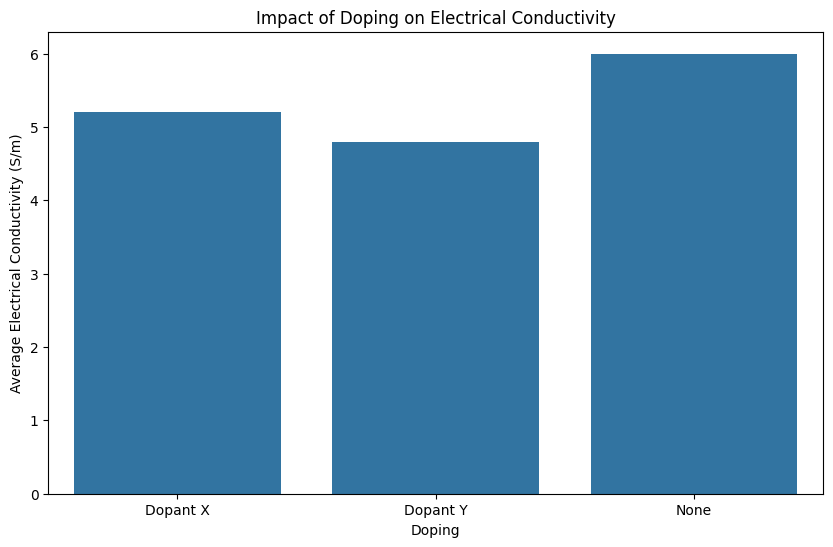

In [14]:
doping_vs_electrical_conductivity = pd.read_sql_query('''
SELECT m.Doping, AVG(p.PropertyValue) AS AvgElectricalConductivity
FROM Materials m
JOIN Properties p ON m.MaterialID = p.MaterialID
WHERE p.PropertyName = 'Electrical Conductivity'
GROUP BY m.Doping;
''', conn)

# Close the database connection
conn.close()

plt.figure(figsize=(10, 6))
sns.barplot(x='Doping', y='AvgElectricalConductivity', data=doping_vs_electrical_conductivity)
plt.title('Impact of Doping on Electrical Conductivity')
plt.xlabel('Doping')
plt.ylabel('Average Electrical Conductivity (S/m)')
plt.savefig('../visualizations/oping_vs_electrical_conductivity')
plt.show()
